In [226]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# import tensorflow as tf
from tensorflow.compat.v1.estimator.experimental import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sb
import json

In [227]:
# 데이터 파일명
filename = 'perfumes.xlsx' 

# DataFrame 생성
df_train = pd.read_excel(filename, sheet_name=0)
df_test = pd.read_excel(filename, sheet_name=1)

df = pd.DataFrame(
    columns=['Season', 'Time', 'Gender', 'TPO', 'Mood']
);

# df['Index'] = df_train.index
df['Season'] = df_train.Season
df['Time'] = df_train.Time
df['Gender'] = df_train.Gender
df['TPO'] = df_train.TPO
df['Mood'] = df_train.Mood

df

,Season,Time,Gender,TPO,Mood
0,1,1,0,3,0
1,1,2,0,0,0
2,2,1,1,3,3
3,1,1,2,0,0
4,0,0,1,2,3
...,...,...,...,...,...
1106,1,2,1,3,3
1107,0,0,2,2,3
1108,1,1,2,3,0
1109,2,2,2,3,0


In [228]:
# Dataframe -> array 변환
points = np.array(df.values)

# 예측 데이터를 (5 -> 2) 차원 축소
pca = PCA(n_components=2)  # 2차원으로 축소하기 위한 pca 변수 생성
points = pca.fit_transform(points) # 2차원으로 축소

def input_fn():
  return tf.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_clusters = 10
kmeans = KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 20
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
#   if previous_centers is not None:
#     print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
#   print('score:', kmeans.score(input_fn))
# print('cluster centers:', cluster_centers)

# 예측
# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn)) # 클러스터 분류
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\김다은\\AppData\\Local\\Temp\\tmp2i4t4rne', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflo

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 15...
INFO:tensorflow:Loss for final step: 266.7372.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\김다은\AppData\Local\Temp\tmp2i4t4rne\model.ckpt-15
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 15...
INFO:tensorflow:Saving checkpoints for 15 into C:\Users\김다은\AppData\Local\Temp\tmp2i4t4rne\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 15...
INFO:tensorflow:loss = 266.7372, step = 16
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 17...
INFO:tensorflow:Saving checkpoints for 17 into C:\Users\김다은\AppData\Local\Temp\tmp2i4t4rne\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpo

INFO:tensorflow:loss = 266.7372, step = 32
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 33...
INFO:tensorflow:Saving checkpoints for 33 into C:\Users\김다은\AppData\Local\Temp\tmp2i4t4rne\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 33...
INFO:tensorflow:Loss for final step: 266.7372.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\김다은\AppData\Local\Temp\tmp2i4t4rne\model.ckpt-33
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 33...
INFO:tensorflow:Saving checkpoints for 33 into C:\Users\김다은\AppData\Local\Temp\tmp2i4t4rne\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 33...
INFO:tensorflow:loss = 266.7372, step = 34
INFO:tensorflow:Callin

point: [1.45223269 1.44445839] is in cluster 9 centered at [1.6277165 1.2522241]
point: [1.41115299 1.50359272] is in cluster 9 centered at [1.6277165 1.2522241]
point: [2.41374491 0.31099099] is in cluster 9 centered at [1.6277165 1.2522241]
point: [-0.92593808  1.44820853] is in cluster 0 centered at [-1.0010945  1.5125688]
point: [1.45223269 1.44445839] is in cluster 9 centered at [1.6277165 1.2522241]
point: [-0.92593808  1.44820853] is in cluster 0 centered at [-1.0010945  1.5125688]
point: [-0.92593808  1.44820853] is in cluster 0 centered at [-1.0010945  1.5125688]
point: [-1.21667947  0.22018822] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [-1.44572838 -0.9248086 ] is in cluster 1 centered at [-1.4457284 -0.9248086]
point: [-1.44572838 -0.9248086 ] is in cluster 1 centered at [-1.4457284 -0.9248086]
point: [1.66960224 2.21257095] is in cluster 9 centered at [1.6277165 1.2522241]
point: [-1.67321178 -0.26327412] is in cluster 6 centered at [-1.583051   -0.274459

point: [-1.2900513  -0.23971953] is in cluster 6 centered at [-1.583051   -0.27445945]
point: [-0.92593808  1.44820853] is in cluster 0 centered at [-1.0010945  1.5125688]
point: [-1.1960667   0.36234604] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [-1.67321178 -0.26327412] is in cluster 6 centered at [-1.583051   -0.27445945]
point: [-0.92593808  1.44820853] is in cluster 0 centered at [-1.0010945  1.5125688]
point: [-1.1960667   0.36234604] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [-1.01992269  0.84614295] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [-1.38403591 -0.84178511] is in cluster 3 centered at [-1.3567281 -0.8543577]
point: [-1.2900513  -0.23971953] is in cluster 6 centered at [-1.583051   -0.27445945]
point: [-1.38403591 -0.84178511] is in cluster 3 centered at [-1.3567281 -0.8543577]
point: [-1.38403591 -0.84178511] is in cluster 3 centered at [-1.3567281 -0.8543577]
point: [-1.01992269  0.84614295] is in cluster 5 center

point: [-1.73490425 -0.34629761] is in cluster 6 centered at [-1.583051   -0.27445945]
point: [-1.64091964  0.25576796] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [2.41374491 0.31099099] is in cluster 9 centered at [1.6277165 1.2522241]
point: [-1.38403591 -0.84178511] is in cluster 3 centered at [-1.3567281 -0.8543577]
point: [1.18210408 0.3585959 ] is in cluster 4 centered at [ 1.1664155  -0.03642773]
point: [ 2.1436163 -0.7748715] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [ 2.2786806  -0.23194025] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [-1.54693504  0.85783354] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [1.18210408 0.3585959 ] is in cluster 4 centered at [ 1.1664155  -0.03642773]
point: [ 2.26700124 -0.60882451] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [-1.38403591 -0.84178511] is in cluster 3 centered at [-1.3567281 -0.8543577]
point: [-1.44572838 -0.9248086 ] is in cluster 1 centered at [-1.44

point: [ 1.95564708 -1.97900264] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [ 0.72546331 -1.43476763] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [ 0.72546331 -1.43476763] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [ 2.17301663 -1.21089009] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [2.47543738 0.39401449] is in cluster 9 centered at [1.6277165 1.2522241]
point: [-1.1960667   0.36234604] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [-1.01992269  0.84614295] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [1.57561763 1.61050537] is in cluster 9 centered at [1.6277165 1.2522241]
point: [-1.154987    0.30321171] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [-1.44416287  0.8817227 ] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [-1.1960667   0.36234604] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [-1.01992269  0.84614295] is in cluster 5 centered at [-1.21

point: [ 0.72546331 -1.43476763] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [ 0.72546331 -1.43476763] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [ 0.72546331 -1.43476763] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [ 0.72546331 -1.43476763] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [-1.44572838 -0.9248086 ] is in cluster 1 centered at [-1.4457284 -0.9248086]
point: [-1.48524257  0.94085703] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [1.39947362 1.12670846] is in cluster 9 centered at [1.6277165 1.2522241]
point: [1.44055332 1.06757413] is in cluster 9 centered at [1.6277165 1.2522241]
point: [ 1.21150441 -0.07742269] is in cluster 4 centered at [ 1.1664155  -0.03642773]
point: [-0.09215966 -1.30299663] is in cluster 3 centered at [-1.3567281 -0.8543577]
point: [-1.1960667   0.36234604] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [ 1.21150441 -0.07742269] is in cluster 4 centered at [ 1.1664

point: [-1.15342149  2.10974301] is in cluster 0 centered at [-1.0010945  1.5125688]
point: [-1.38403591 -0.84178511] is in cluster 3 centered at [-1.3567281 -0.8543577]
point: [-1.38403591 -0.84178511] is in cluster 3 centered at [-1.3567281 -0.8543577]
point: [-1.154987    0.30321171] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [-1.01992269  0.84614295] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [-1.154987    0.30321171] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [-1.44416287  0.8817227 ] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [-1.48524257  0.94085703] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [-1.38403591 -0.84178511] is in cluster 3 centered at [-1.3567281 -0.8543577]
point: [-1.48524257  0.94085703] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [-1.38403591 -0.84178511] is in cluster 3 centered at [-1.3567281 -0.8543577]
point: [-1.38403591 -0.84178511] is in cluster 3 centered at 

point: [ 2.1436163 -0.7748715] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [ 0.72546331 -1.43476763] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [ 1.95564708 -1.97900264] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [ 1.95564708 -1.97900264] is in cluster 2 centered at [ 1.8421562 -1.1965165]
point: [-1.37079103  1.34163045] is in cluster 0 centered at [-1.0010945  1.5125688]
point: [-1.44572838 -0.9248086 ] is in cluster 1 centered at [-1.4457284 -0.9248086]
point: [-0.92593808  1.44820853] is in cluster 0 centered at [-1.0010945  1.5125688]
point: [-1.44416287  0.8817227 ] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [1.44055332 1.06757413] is in cluster 9 centered at [1.6277165 1.2522241]
point: [-1.154987    0.30321171] is in cluster 8 centered at [-1.1877116   0.32499918]
point: [-1.01992269  0.84614295] is in cluster 5 centered at [-1.2165772  0.8662589]
point: [-1.01992269  0.84614295] is in cluster 5 centered at [-1.2165

In [219]:
# 모델 저장


AttributeError: 'int' object has no attribute 'name'

In [205]:
# data 들의 데이터 프레임 생성
df_res = pd.DataFrame(points, columns=['x', 'y'])
df_res['cluster'] = cluster_indices
df_res

,x,y,cluster
0,1.440553,1.067574,0
1,2.443145,-0.125028,2
2,-1.350178,1.483788,9
3,2.184696,-0.834006,2
4,-1.384036,-0.841785,5
...,...,...,...
1106,-1.309099,1.424654,9
1107,-1.445728,-0.924809,5
1108,1.317168,0.901527,0
1109,1.546217,2.046524,1


In [206]:
# 클러스터 중심점들의 데이터프레임 생성
df_center = pd.DataFrame(cluster_centers, columns=['x', 'y'])
df_center['cluster'] = df_center.index
df_center

,x,y,cluster
0,1.419489,1.211894,0
1,1.626760,2.154916,1
2,2.322832,-0.308787,2
3,-1.585277,-0.254066,3
4,2.035746,-1.815665,4
5,-1.392081,-0.852612,5
6,-1.194427,0.522606,6
7,1.144707,-0.015724,7
8,0.676632,-1.377593,8
9,-1.001094,1.512569,9


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Centers')

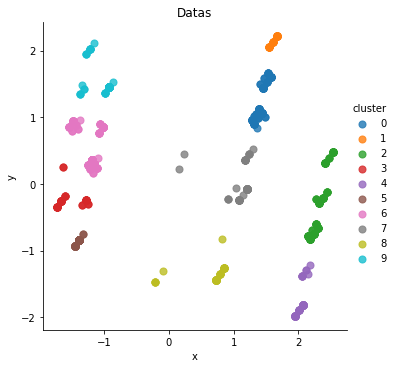

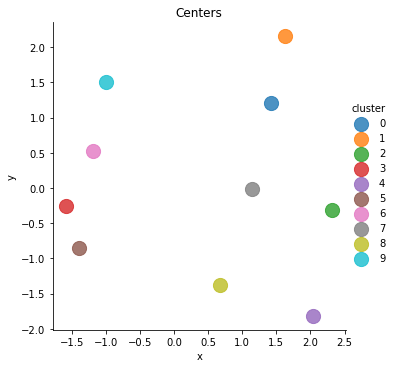

In [207]:
# x축, y축, 데이터=데이터프레임, scatter_kws=데이터 점의 크기
# hue="cluster" : 클러스터마다 색깔 지정
sb.lmplot('x', 'y', data=df_res, fit_reg=False, scatter_kws={"s": 50}, hue="cluster")
plt.title('Datas')
sb.lmplot('x', 'y', data=df_center, fit_reg=False, scatter_kws={"s": 200}, hue="cluster")
plt.title('Centers')

array([[ 1.4194888 ,  1.2118938 ],
       [ 1.62676   ,  2.1549156 ],
       [ 2.3228323 , -0.3087867 ],
       [-1.5852767 , -0.2540661 ],
       [ 2.0357459 , -1.8156649 ],
       [-1.392081  , -0.8526122 ],
       [-1.1944268 ,  0.5226062 ],
       [ 1.1447071 , -0.01572394],
       [ 0.6766319 , -1.3775934 ],
       [-1.0010945 ,  1.5125688 ]], dtype=float32)